In [98]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split

LOAD THE DATASET

In [80]:
data=pd.read_csv('tested.csv')

In [3]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [12]:
data.shape

(418, 12)

CHECK FOR MISSING VALUES

In [6]:
len(data)-data.count()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
data['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [11]:
data['Cabin'].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [ ]:
list(data['Cabin'].unique())

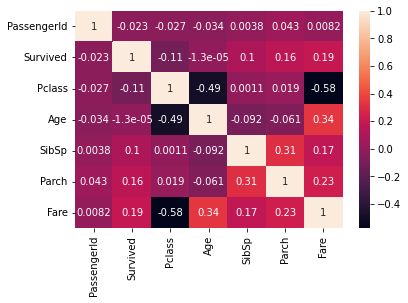

In [10]:
ax = sns.heatmap(data.corr(), annot=True)

IMPUTE MISSING VALUES IN AGE WITH MEAN AND EXTRACT THE LETTER OUT OF CABIN

In [81]:
data['Age']=data['Age'].fillna(np.mean(data['Age']))

In [82]:
data['Fare']=data['Fare'].fillna(np.mean(data['Fare']))

In [83]:
data['Letter']=data['Cabin'].str[:1]

In [22]:
data['Letter'].describe()

count     91
unique     7
top        C
freq      35
Name: Letter, dtype: object

In [26]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Letter
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,C
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,C


In [84]:
data['Letter'].fillna('C',inplace=True)

CHOOSE THE COLUMNS THAT MAKE SENSE TO THE MODEL (FROM DOMAIN KNOOWLEDGE)

In [117]:
df=data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Letter']]

EXPLORE THE COLUMNS

In [29]:
df['Survived'].astype('str').describe()

count     418
unique      2
top         0
freq      266
Name: Survived, dtype: object

In [30]:
df['Pclass'].astype('str').describe()

count     418
unique      3
top         3
freq      218
Name: Pclass, dtype: object

In [32]:
df['SibSp'].astype('str').describe()

count     418
unique      7
top         0
freq      283
Name: SibSp, dtype: object

In [33]:
df['Parch'].astype('str').describe()

count     418
unique      8
top         0
freq      324
Name: Parch, dtype: object

In [34]:
df['Embarked'].astype('str').describe()

count     418
unique      3
top         S
freq      270
Name: Embarked, dtype: object

In [35]:
df['Letter'].astype('str').describe()

count     418
unique      7
top         C
freq      362
Name: Letter, dtype: object

In [62]:
v=['Survived','Pclass','SibSp','Parch','Embarked','Letter','Sex']

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(9, 3), sharey=True)
v=['Survived','Pclass','SibSp','Parch','Embarked','Letter']
sub=df
sub['one']=1
for i in range(6):
  dfr=pd.DataFrame(sub.groupby(v[i])['one'].count()).reset_index()
  names=list(dfr[v[i]])
  values=list(dfr['one'])

  axs[i].bar(names, values)

fig.suptitle('Distribution of Categor Variables')

In [43]:
df['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

(array([338.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

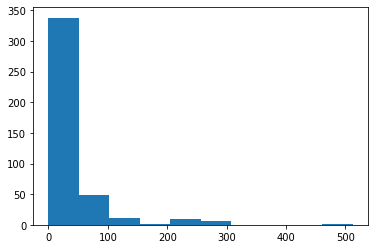

In [45]:
plt.hist(df['Fare'])

LABEL ENCODE THE CATEGORICAL VARIABLES AND GET PREPARED FOR THE MODEL

In [ ]:
v=['Pclass','SibSp','Parch','Embarked','Letter']
df_encoded=df

for i in v:

  encoder=LabelEncoder()

  df_encoded[i] = (encoder.fit_transform(df_encoded[i]))




In [ ]:
df_encoded.drop(columns=['Sex'],inplace=True)

In [135]:
df_train,df_test=train_test_split(df_encoded,test_size=0.15) #stratified

In [136]:
X,Y=df_train.drop(columns=['Survived']),df_train['Survived']

In [137]:
X

,Pclass,Age,SibSp,Parch,Fare,Embarked,Letter
372,0,49.00000,0,0,0.0000,2,1
123,2,28.00000,0,0,7.2500,2,2
225,2,30.27259,0,2,15.2458,0,2
165,2,26.00000,1,1,22.0250,2,2
364,0,25.00000,1,0,55.4417,0,4
...,...,...,...,...,...,...,...
260,2,36.50000,1,0,17.4000,2,2
185,1,40.00000,0,0,16.0000,2,2
42,2,41.00000,0,0,7.8500,2,2
82,0,49.00000,0,0,26.0000,2,2


In [88]:
len(df_encoded)-df_encoded.count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Letter      0
dtype: int64

In [138]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [139]:
df_test['prediction']=clf.predict(df_test.drop(columns=['Survived']))

In [140]:
df_test

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Letter,prediction
239,1,0,48.00000,1,0,106.4250,0,2,0
354,1,2,0.17000,1,2,20.5750,2,2,1
178,1,1,36.00000,0,3,39.0000,2,5,1
135,0,2,24.00000,0,0,7.8542,2,2,1
186,1,1,21.00000,0,1,21.0000,2,2,1
...,...,...,...,...,...,...,...,...,...
393,0,1,47.00000,0,0,10.5000,2,2,0
15,1,1,24.00000,1,0,27.7208,0,2,1
286,0,2,30.27259,0,0,7.2500,2,2,0
33,1,2,30.27259,1,2,23.4500,2,2,0


In [141]:
data_crosstab = pd.crosstab(df_test['Survived'],
                            df_test['prediction'], 
                               margins = False)
print(data_crosstab)

prediction   0   1
Survived          
0           24  12
1           17  10


In [143]:
tp=data_crosstab[1][1]
tn=data_crosstab[0][0]
fp=data_crosstab[1][0]
fn=data_crosstab[0][1]


In [144]:
def prop_parity(cross):
  val=(tp+fp)/(tp+fp+tn+fn)
  return(val)

In [147]:
def compare_groups(dataframe,column,metric,actual,preds):
  dff=pd.DataFrame()
  levels=dataframe[column].unique()
  vals=[]
  for level in levels:
    sub=dataframe[dataframe[column]==level]
    data_crosstab = pd.crosstab(sub[actual],
                            sub[preds], 
                               margins = False)
    vals.append(metric(data_crosstab))

  dff['level'],dff['metric']=levels,vals
    
  return(dff)
  


In [149]:
compare_groups(df_test,'Parch',prop_parity,'Survived','prediction')

,level,metric
0,0,0.349206
1,2,0.349206
2,3,0.349206
3,1,0.349206
4,7,0.349206
5,5,0.349206
